# Porque utilizar matrices sparse?

## - memory

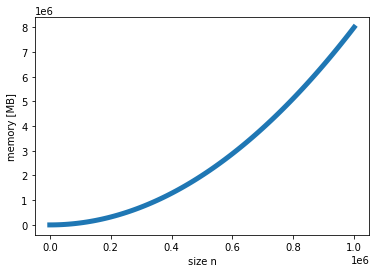

In [6]:
# Double precision matrix
import scipy.sparse as sps
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1e6, 100)
plt.plot(x, 8.0 * (x**2) / 1e6, lw=5); plt.xlabel('size n'); plt.ylabel('memory [MB]'); plt.show();

A = np.random.rand(int(1e3),int(1e3))

## Modos de almacenamiento:
    
    1. csc_matrix: Compressed Sparse Column format
    2. csr_matrix: Compressed Sparse Row format
    3. bsr_matrix: Block Sparse Row format
    4. lil_matrix: List of Lists format
    5. dok_matrix: Dictionary of Keys format
    6. coo_matrix: COOrdinate format (aka IJV, triplet format)
    7. dia_matrix: DIAgonal format

### Coordinate format COO o ijv triplet

In [7]:
# Crear una matriz sparse con formato coo
A = sps.coo_matrix((3, 4), dtype=np.int8); A.todense();

In [8]:
# Crear una matriz sparse con formato coo por (ijv) tuple
row = np.array([0, 3, 1, 0])
col = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
A = sps.coo_matrix((data, (row, col)), shape=(4, 4))
A
A.todense()


matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

In [9]:
# entradas duplicadas
row = np.array([0, 0, 1, 3, 1, 0, 0])
col = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
A= sps.coo_matrix((data, (row, col)), shape=(4, 4))
A.todense()

matrix([[3, 0, 1, 0],
        [0, 2, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]])

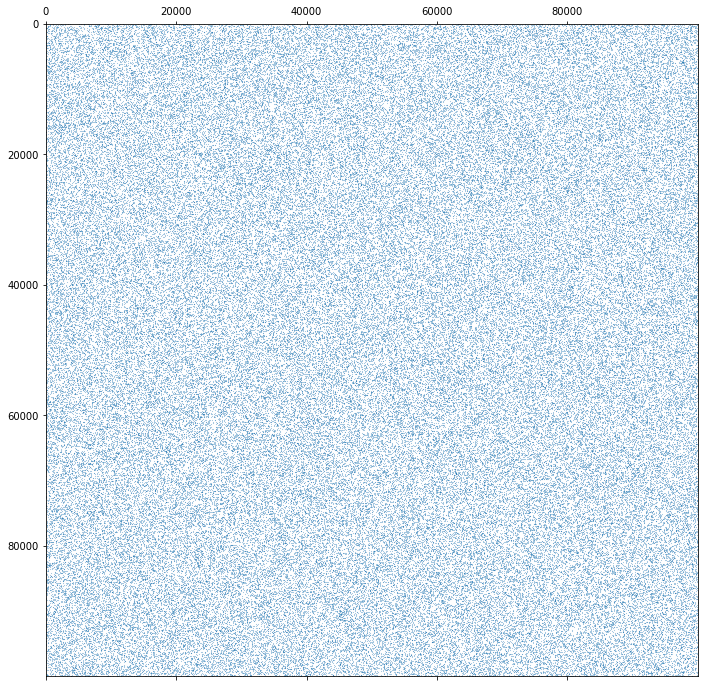

In [10]:
N = 100000
row = np.random.randint(N, size=(2*N))
col = np.random.randint(N, size=(2*N))
data = np.random.randint(N, size=(2*N))
A = sps.coo_matrix((data,(row,col)), shape=(N,N));
plt.figure(figsize=(12,12))
plt.spy(A, precision=0.1, markersize=0.1); plt.show()


### 1. Compressed Sparse Row format (CSR)

In [11]:
# Crear una matriz sparse CSR vacia
A = sps.csr_matrix((3, 4), dtype=np.int8); print(A); A.todense();

In [12]:
# Crear una matriz sparse con formato CSR por (data, (i,j)) tuple
row = np.array([0, 0, 1, 1, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
A = sps.csr_matrix((data, (row, col)), shape=(3, 3));
#print("A sparse:\n", A); 
print("A:\n", A.todense())
print("data: ", A.data); print("indices: ", A.indices); print("indptr: ",A.indptr);

A:
 [[1 0 2]
 [4 0 3]
 [0 5 6]]
data:  [1 2 4 3 5 6]
indices:  [0 2 0 2 1 2]
indptr:  [0 2 4 6]


In [13]:
# (data, indices, indptr) tuple
data = np.array([1, 2, 3, 4, 5, 6]);
indices = col;
indptr = np.array([0,2,4,6]);
B = sps.csr_matrix((data, indices, indptr), shape = (3,3));
print("B:\n",  B.todense())

B:
 [[1 0 2]
 [4 0 3]
 [0 5 6]]


In [14]:
# entradas duplicadas
row = np.array([0, 0, 1, 3, 1, 0, 0])
col = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
A= sps.csr_matrix((data, (row, col)), shape=(4, 4))
A.todense()

matrix([[3, 0, 1, 0],
        [0, 2, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]])

### 2. Compressed Sparse Column format (CSC)

In [15]:
# Crear una matrix sparse con formato CSC por (data, (i,j)) tuple
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
A = sps.csc_matrix((data, (row, col)), shape=(3, 3)); 
#print("A sparse:\n", A)
print("A dense:\n", A.todense());
print("data: ", A.data); print("indices: ", A.indices); print("indptr: ",A.indptr);


# (data, indices, indptr) tuple
data = np.array([1, 4, 5, 2, 3, 6]);
indices = [0, 2,2,0,1,2];
indptr = np.array([0,2,3,6]);
B = sps.csc_matrix((data, indices, indptr), shape = (3,3))
print("B dense:\n",  B.todense())

A dense:
 [[1 0 2]
 [0 0 3]
 [4 5 6]]
data:  [1 4 5 2 3 6]
indices:  [0 2 2 0 1 2]
indptr:  [0 2 3 6]
B dense:
 [[1 0 2]
 [0 0 3]
 [4 5 6]]


In [21]:
from netgen.occ import *
geo = OCCGeometry("soporte eje de levas.step")
#geo.Draw()

from ngsolve import *
from ngsolve.comp import *
from ngsolve.solve import *
from ngsolve.utils import *
from ngsolve.webgui import Draw
mesh = Mesh(geo.GenerateMesh())
print(mesh.nv, mesh.ne)
Draw(mesh)

12434 50502


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2009', 'mesh_dim': 3, 'order2d': 1, 'order3d': 1, 'draw_vol': N…

247947


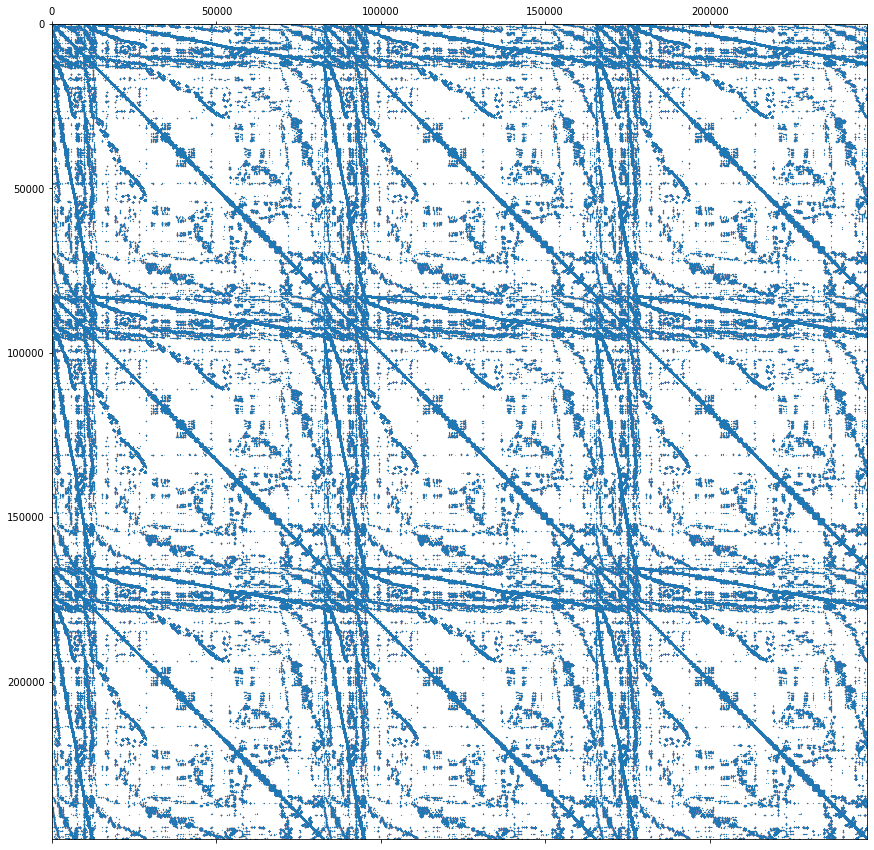

In [24]:
E = 2*(10**11)  # MPa # Young's modulus 200GPa
nu = 0.3  # Poisson's ratio nu
rho = 7870
g = 9.81
# nu = 0.499999 # Poisson's ratio nu - near incompressible
mu = 1 / 2 * (E / (1 + nu))  # lame parameter mu
lamb = E * nu / ((1 + nu) * (1 - 2 * nu))  # lame parameter lambda
# Fuerza
T=CoefficientFunction((0,0,100000000))
bodyforce = CoefficientFunction((0,  -rho * g,0))
uD = CoefficientFunction((0, 0, 0))
def epsilon(u):
    return 0.5 * (grad(u) + grad(u).trans)
def sigma(u):
    return lamb * div(u) * Id(mesh.dim) + mu * (grad(u) + grad(u).trans)
Vh = VectorH1(mesh, order=2, dirichlet='bc_0|bc_1|bc_3|bc_5|bc_6|bc_8|bc_36|bc_38')#"s0|s1|s3|s5|s6|s8") #Condicion de borde de dirchlet en la superficie afirmada por tornillos
print(Vh.ndof)
# variables
u = Vh.TrialFunction()
v = Vh.TestFunction()

# bilinear form
a = BilinearForm(Vh)
a += (InnerProduct(sigma(u), epsilon(v))) * dx
a.Assemble()
L = LinearForm(Vh)
L += bodyforce * v * dx
L += T * v * ds(definedon=mesh.Boundaries(('bc_63')))
L.Assemble()


rows,cols,vals = a.mat.COO()
A = sps.csr_matrix((vals,(rows,cols)))
fig, ax = plt.subplots(1,1, figsize=(20,15))
ax.spy(A,  markersize=0.05)
plt.show()

# grid functions
gfu = GridFunction(Vh, name="uh")


In [25]:
# grid functions
gfu = GridFunction(Vh, name="uh")

# set Dirichlet boudanry condition
gfu.Set(uD, BND)
L.vec.data -= a.mat * gfu.vec

# Solve linear system
solvers.BVP(bf=a, lf=L, gf=gfu)

#vtk = VTKOutput(ma=mesh,coefs=[gfu],names=["sol"],filename="levas",subdivision=3)
Draw(gfu)

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2009', 'mesh_dim': 3, 'order2d': 2, 'order3d': 2, 'draw_vol': T…